# ImageNette

Classical ImageNet dataset is 1.3 million images of various sizes around 500 pixels across, in 1,000 categories, which took a few days to train.

**ImageNette** is a subset of ImageNet with 10 very different classes. It's great to quickly experiment before trying a fleshed-out technique on the full ImageNet dataset.

## 1) Setup

In [1]:
!pip install fastai2

     |████████████████████████████████| 184kB 2.8MB/s 


In [2]:
from fastai2.vision.all import *


## 2) Data

In [3]:
path = untar_data(URLs.IMAGENETTE)

In [13]:
get_image_files(path/'train')

(#9469) [Path('/root/.fastai/data/imagenette2/train/n03417042/n03417042_5235.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03417042/n03417042_6847.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03417042/n03417042_15058.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03417042/n03417042_6959.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03417042/n03417042_708.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03417042/n03417042_5105.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03417042/n03417042_12509.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03417042/n03417042_29855.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03417042/n03417042_4613.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03417042/n03417042_2478.JPEG')...]

In [10]:
dls = ImageDataLoaders.from_folder(path, valid='val', 
        item_tfms=RandomResizedCrop(128, min_scale=0.35), batch_tfms=Normalize.from_stats(*imagenet_stats))

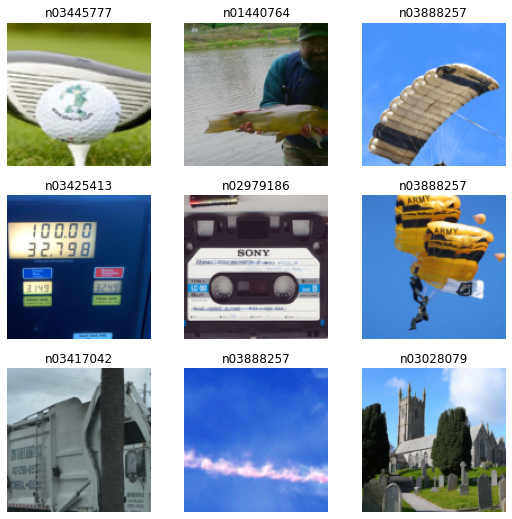

In [4]:
dls.show_batch()

## 3) Training

In [5]:
model = xresnet50()
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.708988,3.037515,0.351083,01:23
1,1.274469,1.502845,0.536815,01:23
2,0.973824,1.122501,0.642038,01:23
3,0.811655,0.761532,0.760000,01:23
4,0.653792,0.653730,0.796433,01:23
